<a href="https://colab.research.google.com/github/tiffanyfu7/monorepo/blob/main/Submission1Team_Conscious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS Submission 1

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score

Importing the datasets from train folder, 2 excel and 1 csv file.

a) the targets (ADHD diagnosis and sex) - TRAINING_SOLUTIONS

b) functional MRI connectome matrices - TRAINING_FUNCTIONAL_CONNECTIVITY

c) socio-demographic information, e.g., subject’s “handedness” or “parent’s education level”, emotions (“Strength and Difficulties Questionnaire”), and parenting information (“Alabama Parenting Questionnaire”). These include both quantitative and categorical metadata.

In [110]:
df_categorical = pd.read_excel('/content/drive/MyDrive/WiDS - Team Conscious/data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
df_functional = pd.read_csv('/content/drive/MyDrive/WiDS - Team Conscious/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
df_quantitative = pd.read_excel('/content/drive/MyDrive/WiDS - Team Conscious/data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')
df_target = pd.read_excel('/content/drive/MyDrive/WiDS - Team Conscious/data/TRAIN/TRAINING_SOLUTIONS.xlsx')

In [111]:
print('target shape: ', df_target.shape)
print('target head: \n', df_target.head())
print('target columns: \n', df_target.columns)

target shape:  (1213, 3)
target head: 
   participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1
target columns: 
 Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')


ADHD_Outcome:

0 = None/Other, 1 = ADHD

Sex_F:

0 = male, 1 = female

In [112]:
print('categorcial shape: ', df_categorical.shape)
print('categorical head: \n', df_categorical.head())
print('categorical columns: \n', df_categorical.columns)

categorcial shape:  (1213, 10)
categorical head: 
   participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   UmrK0vMLopoR                     2016                       1   
1   CPaeQkhcjg7d                     2019                       3   
2   Nb4EetVPm3gs                     2016                       1   
3   p4vPhVu91o4b                     2018                       3   
4   M09PXs7arQ5E                     2019                       3   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                            0   
1                               1.0                            2   
2                               1.0                            8   
3                               0.0                            8   
4                               0.0                            1   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        1                     

In [113]:
columns = {'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site','MRI_Track_Scan_Location','Barratt_Barratt_P1_Edu','Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ'}
df_categorical = df_categorical.drop(columns=columns)
print('categorical head: \n', df_categorical.head())
print('categorical columns: \n', df_categorical.columns)

categorical head: 
   participant_id  PreInt_Demos_Fam_Child_Ethnicity  \
0   UmrK0vMLopoR                               0.0   
1   CPaeQkhcjg7d                               1.0   
2   Nb4EetVPm3gs                               1.0   
3   p4vPhVu91o4b                               0.0   
4   M09PXs7arQ5E                               0.0   

   PreInt_Demos_Fam_Child_Race  
0                            0  
1                            2  
2                            8  
3                            8  
4                            1  
categorical columns: 
 Index(['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity',
       'PreInt_Demos_Fam_Child_Race'],
      dtype='object')


In [114]:
print('functional shape: ', df_functional.shape)
print('functional head: \n', df_functional.head())
print('functional columns: \n', df_functional.columns)

functional shape:  (1213, 19901)
functional head: 
   participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  .

In [115]:
print(df_categorical['participant_id'].equals(df_functional['participant_id']))

False


In [116]:
df_functional.info()
df_functional_copy = df_functional.drop(columns="participant_id")
print('min val in functional connectivity: ',(df_functional_copy.min()).min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
min val in functional connectivity:  -0.3768035681279196


In [117]:
print('max val in functional connectivity: ',(df_functional_copy.max()).max())

max val in functional connectivity:  0.7390653502697623


Ignore the below block

In [118]:
df_functional.sort_values(by=['participant_id'])
print(df_functional.head());

  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.035335     

In [119]:
df_categorical.sort_values(by=['participant_id'])
print(df_categorical.head());

  participant_id  PreInt_Demos_Fam_Child_Ethnicity  \
0   UmrK0vMLopoR                               0.0   
1   CPaeQkhcjg7d                               1.0   
2   Nb4EetVPm3gs                               1.0   
3   p4vPhVu91o4b                               0.0   
4   M09PXs7arQ5E                               0.0   

   PreInt_Demos_Fam_Child_Race  
0                            0  
1                            2  
2                            8  
3                            8  
4                            1  


In [120]:
print('quantitative shape: ', df_quantitative.shape)
print('quantitative head: \n', df_quantitative.head())
print('quantitative columns: \n', df_quantitative.columns)

quantitative shape:  (1213, 19)
quantitative head: 
   participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   UmrK0vMLopoR          40.00                    13               3   
1   CPaeQkhcjg7d         -94.47                    14               3   
2   Nb4EetVPm3gs         -46.67                    14               4   
3   p4vPhVu91o4b         -26.68                    10               5   
4   M09PXs7arQ5E           0.00                    14               5   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0              10               47               13              11   
1              13               34               18              23   
2              10               35               16              10   
3              12               39               19              16   
4              15               40               20              24   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0     

In [121]:
df_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [122]:
df_quantitative.isna().sum()

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [123]:
df_target.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [124]:
df_target.isna().sum()

,0
participant_id,0
ADHD_Outcome,0
Sex_F,0


In [125]:
df_categorical.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
0,UmrK0vMLopoR,0.0,0
1,CPaeQkhcjg7d,1.0,2
2,Nb4EetVPm3gs,1.0,8
3,p4vPhVu91o4b,0.0,8
4,M09PXs7arQ5E,0.0,1


In [126]:
df_categorical.shape

(1213, 3)

In [127]:
df_quantitative.shape

(1213, 19)

In [184]:
# merging all datasets
merged_df = pd.merge(df_quantitative, df_categorical, on='participant_id', how='outer')
merged_df = pd.merge(merged_df, df_functional, on='participant_id', how='outer')
merged_df = pd.merge(merged_df, df_target, on='participant_id', how='outer')
merged_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13,3,15,44,14,20,27,3,...,-0.031380,0.032986,0.081980,0.093708,0.021903,0.029458,-0.016072,0.169368,1,0
1,00fV0OyyoLfw,92.27,14,3,12,35,25,28,30,5,...,0.038632,-0.042040,0.125651,0.127045,0.142448,0.051943,0.138729,0.168951,1,0
2,04X1eiS79T4B,86.67,14,3,21,37,18,26,28,3,...,0.013774,-0.057094,0.084471,0.075582,0.093687,0.091592,0.114817,0.157812,0,1
3,05ocQutkURd6,93.34,14,3,11,42,15,20,28,0,...,-0.075685,-0.029209,0.087122,0.009254,0.114800,0.218728,0.090305,0.159943,0,1
4,06YUNBA9ZRLq,0.00,14,8,12,35,22,12,24,6,...,-0.005693,-0.001515,0.166933,0.005170,0.005126,0.126259,-0.038223,0.181322,1,0


In [190]:
merged_df.shape

(845, 19923)

In [191]:
merged_df = merged_df.dropna()
merged_df.shape

(845, 19923)

In [192]:
X = merged_df.drop(['ADHD_Outcome', 'Sex_F'], axis=1)
participants_list = merged_df['participant_id']
X_fmri = merged_df[df_functional.columns]
# X_fmri = X_fmri.drop(['participant_id'], axis=1)
adhd_columns = list(df_quantitative.columns) + list(df_categorical.columns)
X_adhd = merged_df[adhd_columns]
X_adhd = X_adhd.drop(['MRI_Track_Age_at_Scan'], axis=1) # missing data in MRI_Track_Age

print(X_fmri.head(5))
print(X_adhd.head(5))

  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   00aIpNTbG5uh          0.047912          0.147614          0.035215   
2   04X1eiS79T4B         -0.076074          0.162668          0.050365   
3   05ocQutkURd6          0.054913          0.160764          0.150480   
4   06YUNBA9ZRLq          0.100683          0.103170          0.046506   
5   0FUWCjn9YMN1          0.051337          0.061820          0.092207   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.041143          0.070673          0.080293          0.063638   
2          0.035320          0.055263          0.047298          0.155932   
3          0.113151          0.135581          0.118498          0.032319   
4          0.127893          0.075231          0.019648          0.116546   
5          0.021832          0.088065          0.137403          0.053124   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.016682     

In [178]:
y_fmri = merged_df['Sex_F']
print(len(y_fmri))
y_adhd = merged_df['ADHD_Outcome']
print(len(y_adhd))
print(len(participants_list))

845
845
845


In [179]:
sum(merged_df.isnull().sum())

0

In [180]:
corr_matrix = X_adhd.corr()
corr_matrix

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race
EHQ_EHQ_Total,1.000000,0.024601,-0.000977,0.009192,0.047245,0.006538,0.067982,0.026220,-0.043956,-0.049700,-0.021519,-0.032585,-0.017467,-0.016458,-0.055505,-0.071563,0.001516,-0.016700,-0.016211
ColorVision_CV_Score,0.024601,1.000000,0.092069,0.052435,0.035052,0.051867,-0.003972,0.053575,0.032822,0.022309,0.005287,0.031883,0.072220,0.023503,0.004259,0.001774,-0.015719,0.030649,-0.020828
APQ_P_APQ_P_CP,-0.000977,0.092069,1.000000,0.308517,0.081174,0.364503,0.128521,0.130511,0.180604,0.167163,0.073281,0.191964,0.144019,0.153869,0.088101,0.073590,-0.018852,0.034148,0.095320
APQ_P_APQ_P_ID,0.009192,0.052435,0.308517,1.000000,0.050332,0.399608,0.286723,0.109574,0.237883,0.231666,0.191773,0.239572,0.239544,0.182960,0.153771,0.063145,-0.190167,-0.080063,-0.066235
APQ_P_APQ_P_INV,0.047245,0.035052,0.081174,0.050332,1.000000,0.269716,0.021468,0.746245,-0.141460,-0.145397,-0.052431,-0.137602,-0.085556,-0.101579,-0.111780,-0.134822,0.161868,-0.020289,-0.010495
APQ_P_APQ_P_OPD,0.006538,0.051867,0.364503,0.399608,0.269716,1.000000,0.163845,0.340949,0.315850,0.271249,0.142582,0.292478,0.243939,0.204891,0.165714,0.133571,-0.159004,0.030052,0.015017
APQ_P_APQ_P_PM,0.067982,-0.003972,0.128521,0.286723,0.021468,0.163845,1.000000,0.071163,0.088498,0.035763,0.066584,0.011356,0.065644,-0.047416,0.054413,0.023650,-0.040924,-0.000086,0.027312
APQ_P_APQ_P_PP,0.026220,0.053575,0.130511,0.109574,0.746245,0.340949,0.071163,1.000000,-0.060113,-0.038553,0.011621,-0.052099,-0.002713,-0.033700,-0.010950,-0.030340,0.091224,0.043855,0.015594
SDQ_SDQ_Conduct_Problems,-0.043956,0.032822,0.180604,0.237883,-0.141460,0.315850,0.088498,-0.060113,1.000000,0.741347,0.361192,0.803176,0.535060,0.466309,0.448355,0.386513,-0.362580,0.037036,-0.009026
SDQ_SDQ_Difficulties_Total,-0.049700,0.022309,0.167163,0.231666,-0.145397,0.271249,0.035763,-0.038553,0.741347,1.000000,0.706046,0.889388,0.737567,0.782195,0.837009,0.689092,-0.347857,0.045725,-0.005254


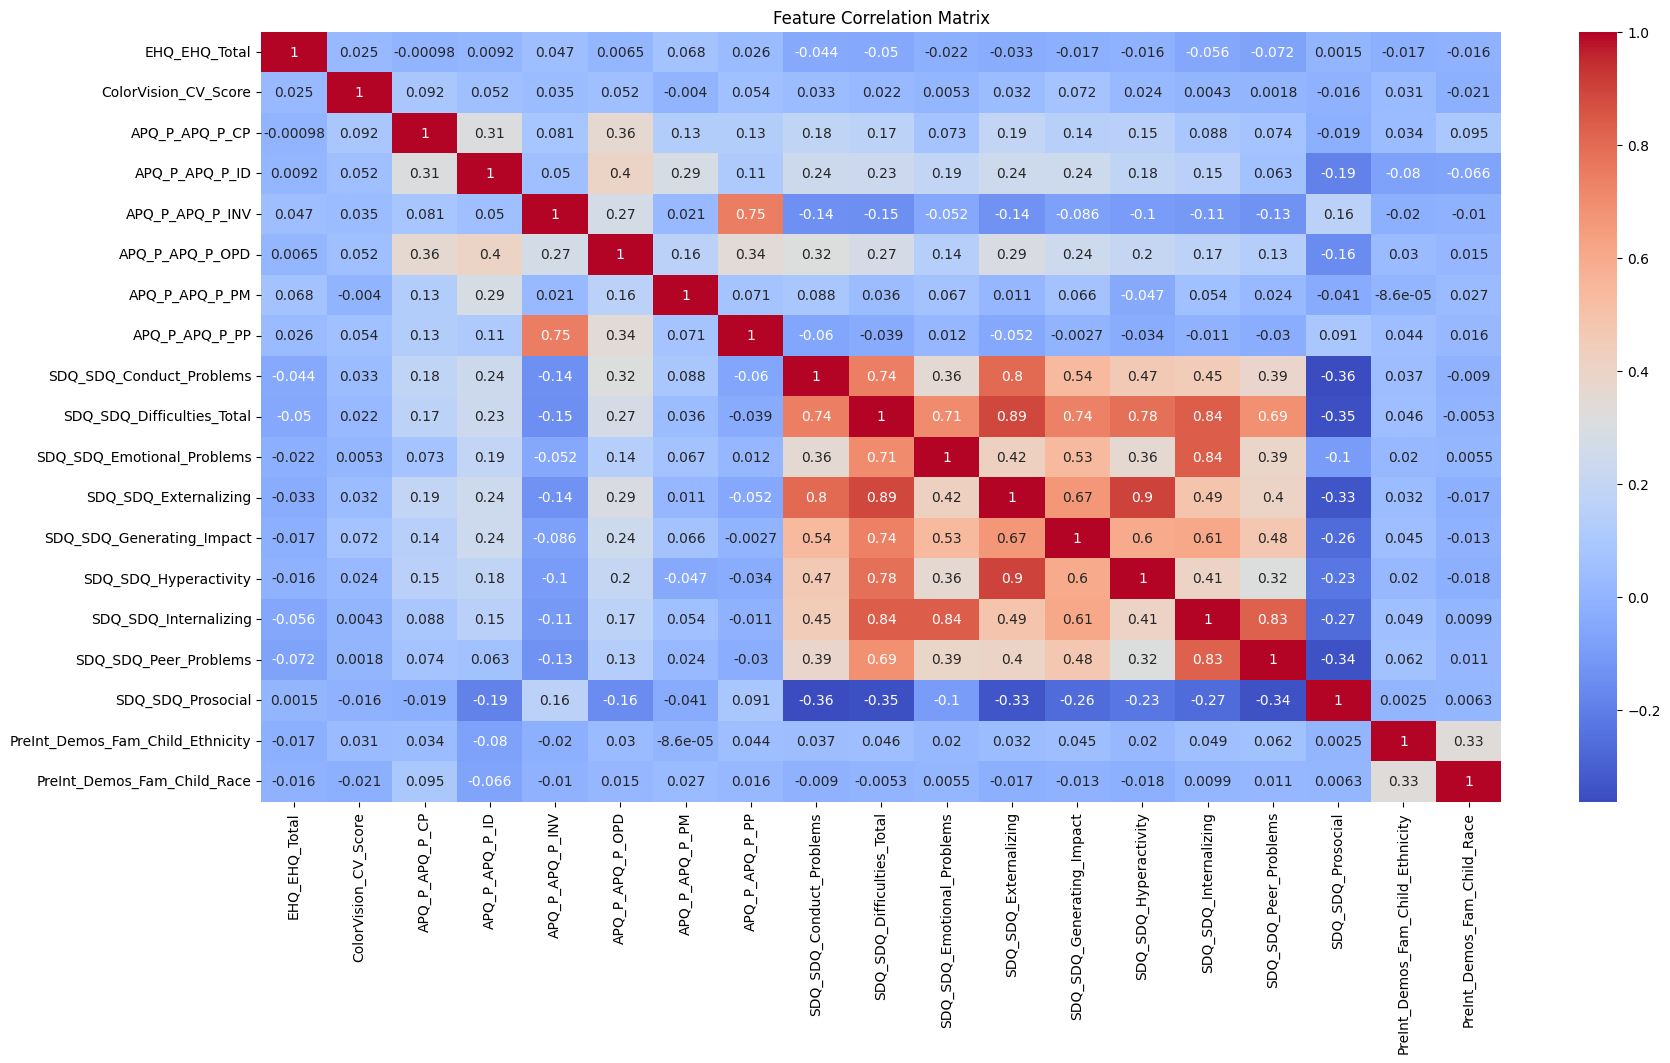

In [181]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Modeling

In [211]:
X_train_adhd, X_test_adhd, y_train_adhd, y_test_adhd = train_test_split(X_adhd, y_adhd, test_size=0.3, random_state=123)

# print(X_train_adhd)
train_participants_id = X_train_adhd['participant_id'].iloc[:,0]
X_train_adhd = X_train_adhd.drop(['participant_id'], axis=1)

test_participants_id = X_test_adhd['participant_id'].iloc[:,0]
X_test_adhd = X_test_adhd.drop(['participant_id'], axis=1)

print(train_participants_id)
print(test_participants_id)
# second split: 15% validation, 15% test
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)
# X_train, y_train: training data (70%)
# X_val, y_val: validation data (15%)
# X_test, y_test: test data (15%)

1017    poOPe7ceWIea
801     fadrxHhFSS0k
1001    obsXLYyDE9nq
596     VLKW4PIOD7Ah
343     HNjDLTaifDI2
            ...     
139     7Fga1GnIjOfA
436     MMH1uM7wltAr
527     RWLTAz0qt46H
498     Pi59C4uUGauF
727     brC47HA73vFe
Name: participant_id, Length: 591, dtype: object
464     NnML6Veyxg3r
676     ZaI5IHj64Nd5
106     52s1ZW91cuyZ
258     DVExKsG2Txil
356     I8H3GTjieiSH
            ...     
309     GAOpTeUSloVu
1143    wP2cLHEkJQEk
548     Sc09auSVBLCV
296     FMuOOmGuYXdd
1101    uS13ICG0EmdG
Name: participant_id, Length: 254, dtype: object


In [194]:
# imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

#Logistic Regression for ADHD Outcomes



In [195]:
# initialize and train the Logistic Regression model
lr_model_adhd = LogisticRegression()
lr_model_adhd.fit(X_train_adhd, y_train_adhd)

LogisticRegression()

In [196]:
# predict on validation data:
y_pred_adhd = lr_model_adhd.predict(X_test_adhd)

accuracy = accuracy_score(y_test_adhd, y_pred_adhd)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7992


In [197]:
f1_score = f1_score(y_test_adhd, y_pred_adhd)
print(f"F1 Score: {f1_score:.4f}")

F1 Score: 0.8478


In [198]:
recall = recall_score(y_test_adhd, y_pred_adhd)
print(f"Recall: {recall:.4f}")

Recall: 0.9045


In [ ]:
# y_log_val
# log_model.predict_proba(X_val)

## Logistic Regression for Sex Classification

### Balancing Sex Labels

In [ ]:
# import numpy as np

# sex_f_labels = []

# for participant_id in participant_ids_list:
#   matched_row = df_target.loc[df_target['participant_id'] == participant_id]
#   if not matched_row.empty:
#     sex_f_label = matched_row['Sex_F'].iloc[0]
#     sex_f_labels.append(sex_f_label)
#   else:
#     print(f"Warning: Participant ID {participant_id} not found in TRAINING_SOLUTIONS.xlsx")
#     sex_f_labels.append(None)

# assert len(sex_f_labels) == len(participant_ids_list)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_fmri, y_fmri, test_size=0.3, random_state=42)
# X_train_participants = X_train['participant_id']
# X_test_participants = X_test['participant_id']
# X_train = X_train.drop('participant_id', axis=1)
# X_test = X_test.drop('participant_id', axis=1)

# # # Fit Logistic Regression with L2 regularization
# # lr_model = LogisticRegression(max_iter=1000, C=1.0)  # You can adjust C as needed
# # lr_model.fit(X_train, y_train)

# # # Predict and evaluate
# # y_pred_fmri = lr_model.predict(X_test)
# # print("Accuracy:", accuracy_score(y_test, y_pred_fmri))
# # print(classification_report(y_test, y_pred_fmri))

Accuracy: 0.6648351648351648
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       231
           1       0.82      0.11      0.19       133

    accuracy                           0.66       364
   macro avg       0.74      0.55      0.49       364
weighted avg       0.72      0.66      0.57       364



# Combining Outcomes

In [213]:
# prompt: from merged_df split the data frame into x_train_adhd and x_test_adhd based on X_train_participants
# print(merged_df.shape)
# print(df_fmri.shape)
# print(X_fmri.head(5))
X_train_fmri = X_fmri[X_fmri['participant_id'].isin(train_participants_id)].drop(['participant_id'], axis=1)
y_train_fmri = merged_df[merged_df['participant_id'].isin(train_participants_id)]['Sex_F']

X_test_fmri = X_fmri[X_fmri['participant_id'].isin(test_participants_id)].drop(['participant_id'], axis=1)
y_test_fmri = merged_df[merged_df['participant_id'].isin(test_participants_id)]['Sex_F']

lr_model_adhd = LogisticRegression()
lr_model_adhd.fit(X_train_fmri, y_train_fmri)

y_pred_adhd = lr_model_adhd.predict(X_test_fmri)

# Fit Logistic Regression with L2 regularization
lr_model = LogisticRegression(max_iter=1000, C=1.0)  # You can adjust C as needed
lr_model.fit(X_train_fmri, y_train_fmri)

# Predict and evaluate
y_pred_fmri = lr_model.predict(X_test_fmri)
print("Accuracy:", accuracy_score(y_test_fmri, y_pred_fmri))
print(classification_report(y_test_fmri, y_pred_fmri))

# accuracy = accuracy_score(y_test_adhd, y_pred_adhd)
# print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7244094488188977
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       174
           1       0.86      0.15      0.26        80

    accuracy                           0.72       254
   macro avg       0.79      0.57      0.54       254
weighted avg       0.76      0.72      0.65       254



In [219]:
print(len(y_pred_fmri))
print(len(y_pred_adhd))
print(len(test_participants_id))

254
254
254


In [218]:
# prompt: concatentate test participate ids, y_red_fmri, and y_pred adhd

import pandas as pd

results_df = pd.DataFrame({
    'participant_id': test_participants_id,
    'y_pred_adhd': y_pred_adhd,
    'y_pred_fmri': y_pred_fmri
})

results_df

,participant_id,y_pred_adhd,y_pred_fmri
464,NnML6Veyxg3r,0,0
676,ZaI5IHj64Nd5,0,0
106,52s1ZW91cuyZ,0,0
258,DVExKsG2Txil,0,0
356,I8H3GTjieiSH,1,1
...,...,...,...
309,GAOpTeUSloVu,0,0
1143,wP2cLHEkJQEk,0,0
548,Sc09auSVBLCV,0,0
296,FMuOOmGuYXdd,0,0
